In [1]:
# Import dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error

## In this iteration of the model:

### - I'll add an additional analysis of store profit as a feature (store_sales - store_cost), replacing sales & cost
### - RF model updated to 250 Decision Trees from 10

In [2]:
# Import dataset
store_df = pd.read_csv('Resources/store_data.csv')
store_df

,id,food_category,food_department,food_family,store_sales_in_millions,store_cost_in_millions,unit_sales_in_millions,promotion_name,brand_name,SRP,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,media_type
0,0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,Carrington,1.84,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,126.62,"Daily Paper, Radio"
1,1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,Carrington,1.84,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,59.86,"Daily Paper, Radio"
2,2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,Carrington,1.84,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,84.16,"Daily Paper, Radio"
3,3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,Carrington,1.84,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,95.78,In-Store Coupon
4,4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,Golden,1.36,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,50.79,Radio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38887,60421,Specialty,Carousel,Non-Consumable,0.99,0.4554,1.0,Green Light Special,King,0.99,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,127.19,Cash Register Handout
38888,60422,Specialty,Carousel,Non-Consumable,1.21,0.4477,1.0,Unbeatable Price Savers,Toretti,1.21,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,78.45,"Sunday Paper, Radio"
38889,60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,ADJ,2.76,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,95.25,In-Store Coupon
38890,60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,Symphony,1.60,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,69.42,Sunday Paper


In [3]:
store_df['grocery_sqft'].nunique()

10

In [4]:
store_df['store_sqft'].nunique()

10

In [5]:

store_df['frozen_sqft'].nunique()

10

In [6]:
store_df['meat_sqft'].nunique()

10

In [7]:
store_df['promotion_name'].nunique()

49

In [8]:
store_df.dtypes

id                           int64
food_category               object
food_department             object
food_family                 object
store_sales_in_millions    float64
store_cost_in_millions     float64
unit_sales_in_millions     float64
promotion_name              object
brand_name                  object
SRP                        float64
gross_weight               float64
net_weight                 float64
recyclable_package         float64
low_fat                    float64
units_per_case             float64
store_type                  object
store_city                  object
store_state                 object
store_sqft                 float64
grocery_sqft               float64
frozen_sqft                float64
meat_sqft                  float64
coffee_bar                 float64
video_store                float64
salad_bar                  float64
prepared_food              float64
florist                    float64
cost                       float64
media_type          

In [9]:
store_df.drop(['id', 'food_category', 'food_department', 'food_family', 'brand_name', 'SRP',''
               'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'store_city',
              'store_state', 'store_type', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'unit_sales_in_millions'], axis=1, inplace=True)
store_df

,store_sales_in_millions,store_cost_in_millions,promotion_name,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,cost
0,7.36,2.7232,Bag Stuffers,27694.0,18670.0,5415.0,3610.0,126.62
1,5.52,2.5944,Cash Register Lottery,27694.0,18670.0,5415.0,3610.0,59.86
2,3.68,1.3616,High Roller Savings,27694.0,18670.0,5415.0,3610.0,84.16
3,3.68,1.1776,Cash Register Lottery,27694.0,18670.0,5415.0,3610.0,95.78
4,4.08,1.4280,Double Down Sale,27694.0,18670.0,5415.0,3610.0,50.79
...,...,...,...,...,...,...,...,...
38887,0.99,0.4554,Green Light Special,22478.0,15321.0,4294.0,2863.0,127.19
38888,1.21,0.4477,Unbeatable Price Savers,22478.0,15321.0,4294.0,2863.0,78.45
38889,2.76,1.3248,You Save Days,22478.0,15321.0,4294.0,2863.0,95.25
38890,1.60,0.4960,Price Cutters,22478.0,15321.0,4294.0,2863.0,69.42


## Group & Aggregate the Data

In [10]:
store_df_new = store_df.groupby(['promotion_name', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft'])
.agg({'store_sales_in_millions': 'mean', 'store_cost_in_millions': 'mean', 'cost': 'mean'})

store_df_new.columns = ["avg_store_sales", "avg_store_cost", 'avg_promo_cost']

store_df_new = store_df_new.reset_index()

store_df_new


,promotion_name,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,avg_store_sales,avg_store_cost,avg_promo_cost
0,Bag Stuffers,27694.0,18670.0,5415.0,3610.0,6.543541,2.605553,115.731675
1,Bag Stuffers,28206.0,22271.0,3561.0,2374.0,3.872727,1.541100,117.930000
2,Bag Stuffers,33858.0,22123.0,7041.0,4694.0,7.122896,2.859237,70.320000
3,Best Savings,21215.0,13305.0,4746.0,3164.0,6.801399,2.736532,114.010000
4,Best Savings,23598.0,14210.0,5633.0,3755.0,6.309864,2.513045,53.820000
...,...,...,...,...,...,...,...,...
181,You Save Days,20319.0,16232.0,2452.0,1635.0,6.714152,2.692020,108.220000
182,You Save Days,22478.0,15321.0,4294.0,2863.0,2.941356,1.133556,95.250000
183,You Save Days,23598.0,14210.0,5633.0,3755.0,6.657332,2.665658,131.810000
184,You Save Days,23688.0,15337.0,5011.0,3340.0,6.738508,2.726105,131.810000


## Calculate Store Profit

In [11]:
store_df_new['avg_store_profit'] = store_df_new['avg_store_sales'] - store_df_new['avg_store_cost']

store_df_new

,promotion_name,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,avg_store_sales,avg_store_cost,avg_promo_cost,avg_store_profit
0,Bag Stuffers,27694.0,18670.0,5415.0,3610.0,6.543541,2.605553,115.731675,3.937987
1,Bag Stuffers,28206.0,22271.0,3561.0,2374.0,3.872727,1.541100,117.930000,2.331627
2,Bag Stuffers,33858.0,22123.0,7041.0,4694.0,7.122896,2.859237,70.320000,4.263659
3,Best Savings,21215.0,13305.0,4746.0,3164.0,6.801399,2.736532,114.010000,4.064866
4,Best Savings,23598.0,14210.0,5633.0,3755.0,6.309864,2.513045,53.820000,3.796819
...,...,...,...,...,...,...,...,...,...
181,You Save Days,20319.0,16232.0,2452.0,1635.0,6.714152,2.692020,108.220000,4.022132
182,You Save Days,22478.0,15321.0,4294.0,2863.0,2.941356,1.133556,95.250000,1.807800
183,You Save Days,23598.0,14210.0,5633.0,3755.0,6.657332,2.665658,131.810000,3.991674
184,You Save Days,23688.0,15337.0,5011.0,3340.0,6.738508,2.726105,131.810000,4.012403


In [12]:
le = LabelEncoder()
store_enc = store_df_new.copy()
store_enc['promotion_name'] = le.fit_transform(store_enc['promotion_name']) 
store_enc

,promotion_name,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,avg_store_sales,avg_store_cost,avg_promo_cost,avg_store_profit
0,0,27694.0,18670.0,5415.0,3610.0,6.543541,2.605553,115.731675,3.937987
1,0,28206.0,22271.0,3561.0,2374.0,3.872727,1.541100,117.930000,2.331627
2,0,33858.0,22123.0,7041.0,4694.0,7.122896,2.859237,70.320000,4.263659
3,1,21215.0,13305.0,4746.0,3164.0,6.801399,2.736532,114.010000,4.064866
4,1,23598.0,14210.0,5633.0,3755.0,6.309864,2.513045,53.820000,3.796819
...,...,...,...,...,...,...,...,...,...
181,48,20319.0,16232.0,2452.0,1635.0,6.714152,2.692020,108.220000,4.022132
182,48,22478.0,15321.0,4294.0,2863.0,2.941356,1.133556,95.250000,1.807800
183,48,23598.0,14210.0,5633.0,3755.0,6.657332,2.665658,131.810000,3.991674
184,48,23688.0,15337.0,5011.0,3340.0,6.738508,2.726105,131.810000,4.012403


In [13]:
# Split preprocessed data into our features and target arrays
X= store_enc.drop(['avg_store_profit', 'avg_store_sales'], axis =1) 
y= store_enc['avg_store_sales'] 

X

,promotion_name,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,avg_store_cost,avg_promo_cost
0,0,27694.0,18670.0,5415.0,3610.0,2.605553,115.731675
1,0,28206.0,22271.0,3561.0,2374.0,1.541100,117.930000
2,0,33858.0,22123.0,7041.0,4694.0,2.859237,70.320000
3,1,21215.0,13305.0,4746.0,3164.0,2.736532,114.010000
4,1,23598.0,14210.0,5633.0,3755.0,2.513045,53.820000
...,...,...,...,...,...,...,...
181,48,20319.0,16232.0,2452.0,1635.0,2.692020,108.220000
182,48,22478.0,15321.0,4294.0,2863.0,1.133556,95.250000
183,48,23598.0,14210.0,5633.0,3755.0,2.665658,131.810000
184,48,23688.0,15337.0,5011.0,3340.0,2.726105,131.810000


In [14]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


### Adding More Decision Trees

In [15]:
# Initializing the Random Forest Regression model with 250 decision trees
model = RandomForestRegressor(n_estimators = 250, random_state = 42)

# Fitting the Random Forest Regression model to the data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [16]:
# Predicting the target values of the test set
y_pred = model.predict(X_test)
y_pred

array([2.76318689, 6.51347093, 6.61840135, 4.12434555, 6.80511682,
       6.90700336, 6.64409527, 6.40137141, 6.64662721, 3.25613852,
       3.24651367, 6.33351744, 6.38189061, 6.46148103, 6.64395489,
       3.59754579, 6.96416549, 2.86022832, 3.38823918, 6.37148244,
       3.24174387, 3.62459009, 6.76676787, 3.54676924, 6.79350695,
       6.76379414, 6.44719186, 6.77836217, 6.3572584 , 6.61343541,
       6.64658362, 3.31361268, 6.77542863, 6.90867915, 2.74249938,
       3.60429263, 6.74036821, 6.57037213, 6.14804208, 6.61213645,
       6.68402539, 6.13308145, 6.80310011, 6.32954772, 6.16697358,
       6.9281867 , 7.05313175])

In [17]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)


RMSE:
 0.099


<AxesSubplot:xlabel='avg_store_sales', ylabel='Predicted'>

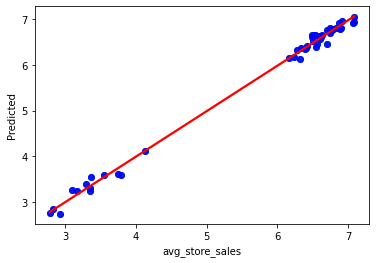

In [18]:
# Plot the result 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

#### Feature Importance

In [19]:
# Calculate feature importance in the Random Forest model.
importances = model.feature_importances_
importances


array([7.69773489e-04, 1.71270424e-04, 2.06496415e-04, 1.91416981e-04,
       1.84278667e-04, 9.97628177e-01, 8.48587393e-04])

In [20]:
# Sort the features by their importance.
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.9976281766306435, 'avg_store_cost'),
 (0.0008485873933033586, 'avg_promo_cost'),
 (0.0007697734890142423, 'promotion_name'),
 (0.00020649641460033046, 'grocery_sqft'),
 (0.00019141698145545307, 'frozen_sqft'),
 (0.00018427866696986493, 'meat_sqft'),
 (0.0001712704240132115, 'store_sqft')]

### Conclusion: Store Cost is the the single most important feature when determining Store Sales


## Now redoing previous analysis with store profit as a feature inplace of store_sales & store_cost

In [21]:
# Split preprocessed data into our features and target arrays
X= store_enc.drop(['avg_store_profit', 'avg_store_sales', 'avg_store_cost'], axis =1) 
y= store_enc['avg_store_profit'] 

X

,promotion_name,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,avg_promo_cost
0,0,27694.0,18670.0,5415.0,3610.0,115.731675
1,0,28206.0,22271.0,3561.0,2374.0,117.930000
2,0,33858.0,22123.0,7041.0,4694.0,70.320000
3,1,21215.0,13305.0,4746.0,3164.0,114.010000
4,1,23598.0,14210.0,5633.0,3755.0,53.820000
...,...,...,...,...,...,...
181,48,20319.0,16232.0,2452.0,1635.0,108.220000
182,48,22478.0,15321.0,4294.0,2863.0,95.250000
183,48,23598.0,14210.0,5633.0,3755.0,131.810000
184,48,23688.0,15337.0,5011.0,3340.0,131.810000


In [22]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [23]:
# Initializing the Random Forest Regression model with 250 decision trees
model = RandomForestRegressor(n_estimators = 250, random_state = 42)

# Fitting the Random Forest Regression model to the data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [24]:
# Predicting the target values of the test set
y_pred = model.predict(X_test)
y_pred

array([1.88647182, 4.00596064, 4.0385985 , 1.97848091, 4.03932345,
       3.92842505, 3.96765694, 3.98456042, 4.05175133, 2.39101509,
       2.34768226, 3.99455562, 4.03341566, 3.99447655, 4.02431468,
       2.32521301, 4.01410203, 2.27434809, 2.05067232, 3.98655853,
       2.05400247, 1.78847061, 3.88929761, 2.16754806, 4.12902236,
       3.89048553, 4.03629249, 3.99975525, 3.89548564, 3.99877422,
       4.03989659, 2.09773029, 4.02381893, 3.96666456, 2.10758085,
       2.04447907, 4.00873514, 4.05994439, 4.00395702, 3.95034175,
       4.03316202, 3.96576319, 3.90142955, 4.01019168, 4.05176433,
       3.9710199 , 3.96536873])

In [25]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)


RMSE:
 0.223


<AxesSubplot:xlabel='avg_store_profit', ylabel='Predicted'>

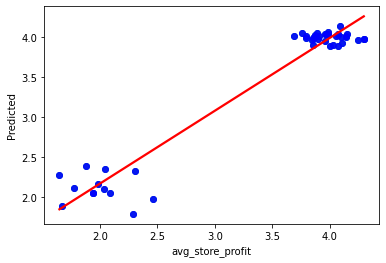

In [26]:
# Plot the result 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

#### Feature Importance

In [27]:
# Calculate feature importance in the Random Forest model.
importances = model.feature_importances_
importances

array([0.02529431, 0.13862188, 0.00180491, 0.41561591, 0.39698314,
       0.02167985])

In [28]:
# Sort the features by their importance.
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.41561591107452933, 'frozen_sqft'),
 (0.3969831433948253, 'meat_sqft'),
 (0.13862187770305426, 'store_sqft'),
 (0.02529430532455188, 'promotion_name'),
 (0.02167985098199413, 'avg_promo_cost'),
 (0.0018049115210450257, 'grocery_sqft')]

### Conclusion: 
### - The size of a store's frozen & meat departments are strong determinants of store profit 
### - This relationship gets weaker as as store profits decrease

## Evaluating Promotion_Cost based on store features (with Profit instead of Store Sales & Store Cost)

In [29]:
# Split preprocessed data into our features and target arrays
X= store_enc.drop(['avg_promo_cost', 'avg_store_sales', 'avg_store_cost'], axis =1) 
y= store_enc['avg_promo_cost'] 

X

,promotion_name,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,avg_store_profit
0,0,27694.0,18670.0,5415.0,3610.0,3.937987
1,0,28206.0,22271.0,3561.0,2374.0,2.331627
2,0,33858.0,22123.0,7041.0,4694.0,4.263659
3,1,21215.0,13305.0,4746.0,3164.0,4.064866
4,1,23598.0,14210.0,5633.0,3755.0,3.796819
...,...,...,...,...,...,...
181,48,20319.0,16232.0,2452.0,1635.0,4.022132
182,48,22478.0,15321.0,4294.0,2863.0,1.807800
183,48,23598.0,14210.0,5633.0,3755.0,3.991674
184,48,23688.0,15337.0,5011.0,3340.0,4.012403


In [30]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [31]:
# Initializing the Random Forest Regression model with 250 decision trees
model = RandomForestRegressor(n_estimators = 250, random_state = 42)

# Fitting the Random Forest Regression model to the data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [32]:
# Predicting the target values of the test set
y_pred = model.predict(X_test)
y_pred

array([ 95.55346463, 101.44301763,  97.18339326, 100.41877712,
        96.61391292, 107.69828582,  89.09150975,  99.49542405,
       100.14858756, 110.26349632, 100.32154685, 108.69808743,
       101.69238185,  90.0343073 ,  97.52508708, 100.12652253,
        94.066927  , 108.77771632, 103.63230155, 101.98745911,
        99.24826727, 103.63782905, 105.08306657, 105.76159526,
        89.41626026,  84.16005837,  99.7480261 ,  92.11481749,
        75.70871313, 103.25881221,  94.21287928, 101.14172437,
        98.64033423, 106.54935902, 116.16073219, 105.86734414,
        98.42487059, 114.64823492,  81.306404  ,  85.75951303,
       106.24890037,  95.06996648,  84.90060735,  83.47187464,
        96.40313784, 101.88953577, 104.56480964])

In [33]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)


RMSE:
 28.591


In [36]:
store_enc.describe()

,promotion_name,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,avg_store_sales,avg_store_cost,avg_promo_cost,avg_store_profit
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,25.193548,26971.209677,18285.736559,5211.392473,3474.155914,5.945105,2.378742,100.049081,3.566363
std,14.241362,5902.803920,3871.776338,1770.293572,1179.971512,1.372404,0.549979,29.131529,0.824053
min,0.000000,20319.000000,13305.000000,2452.000000,1635.000000,2.593500,1.042712,50.790000,1.477085
25%,13.000000,22478.000000,15321.000000,4294.000000,2863.000000,6.171196,2.467657,73.122770,3.734282
50%,26.000000,23688.000000,16232.000000,4923.000000,3282.000000,6.580150,2.634107,101.540560,3.951269
75%,37.750000,30268.000000,22123.000000,5633.000000,3755.000000,6.758989,2.708446,124.345000,4.068404
max,48.000000,39696.000000,24390.000000,9184.000000,6122.000000,7.195266,2.928695,149.080000,4.361904


<AxesSubplot:xlabel='avg_promo_cost', ylabel='Predicted'>

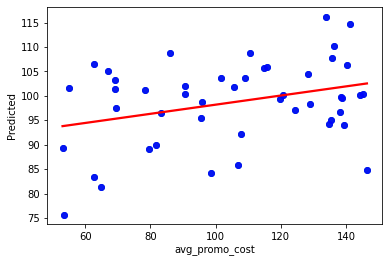

In [38]:
# Plot the result 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

#### Feature Importance

In [39]:
# Calculate feature importance in the Random Forest model.
importances = model.feature_importances_
importances

array([0.36167287, 0.05614176, 0.05456862, 0.06299067, 0.05714919,
       0.40747691])

In [40]:
# Sort the features by their importance.
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.4074769063729893, 'avg_store_profit'),
 (0.3616728663521012, 'promotion_name'),
 (0.06299066532611391, 'frozen_sqft'),
 (0.05714918848165028, 'meat_sqft'),
 (0.05614175670894129, 'store_sqft'),
 (0.05456861675820411, 'grocery_sqft')]

### Conclusion: 
### - the Cost of a Sales Promotions is not well predicted by the by a grocery store's physical characteristics 
### - The type of Promotion (promotion_name) and Store Profit are the most important feature w/r/t determining Promotion Costs

## Evaluating Promotion_Name based on store features 

In [41]:
# Split preprocessed data into our features and target arrays
X= store_enc.drop(['promotion_name', 'avg_store_sales', 'avg_store_cost'], axis =1) 
y= store_enc['promotion_name'] 

X

,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,avg_promo_cost,avg_store_profit
0,27694.0,18670.0,5415.0,3610.0,115.731675,3.937987
1,28206.0,22271.0,3561.0,2374.0,117.930000,2.331627
2,33858.0,22123.0,7041.0,4694.0,70.320000,4.263659
3,21215.0,13305.0,4746.0,3164.0,114.010000,4.064866
4,23598.0,14210.0,5633.0,3755.0,53.820000,3.796819
...,...,...,...,...,...,...
181,20319.0,16232.0,2452.0,1635.0,108.220000,4.022132
182,22478.0,15321.0,4294.0,2863.0,95.250000,1.807800
183,23598.0,14210.0,5633.0,3755.0,131.810000,3.991674
184,23688.0,15337.0,5011.0,3340.0,131.810000,4.012403


In [42]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [43]:
# Initializing the Random Forest Regression model with 250 decision trees
model = RandomForestRegressor(n_estimators = 250, random_state = 42)

# Fitting the Random Forest Regression model to the data
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=250, random_state=42)

In [44]:
# Predicting the target values of the test set
y_pred = model.predict(X_test)
y_pred

array([34.66 , 27.16 , 21.108, 26.308, 21.596, 26.192, 32.192, 30.156,
       24.644, 28.88 , 36.916, 26.364, 13.568, 18.92 , 20.784, 16.428,
       25.92 , 25.152, 30.92 , 29.38 , 21.424, 30.984, 20.328, 15.9  ,
       33.62 , 27.772, 18.204, 29.284, 17.388, 22.532, 27.828, 33.024,
       27.34 , 20.352, 29.868, 18.452, 28.356, 23.816, 33.248, 33.868,
       21.436, 28.096, 29.028, 26.124, 32.616, 22.832, 22.252])

In [45]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)


RMSE:
 15.619


<AxesSubplot:xlabel='promotion_name', ylabel='Predicted'>

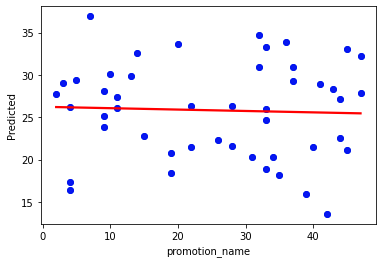

In [46]:
# Plot the result 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

#### Feature Importance

In [47]:
# Calculate feature importance in the Random Forest model.
importances = model.feature_importances_
importances

array([0.07691537, 0.06703519, 0.04613656, 0.0452751 , 0.42149419,
       0.34314359])

In [48]:
# Sort the features by their importance.
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.4214941869799104, 'avg_promo_cost'),
 (0.34314358598292427, 'avg_store_profit'),
 (0.07691537443079287, 'store_sqft'),
 (0.06703519443121235, 'grocery_sqft'),
 (0.04613655662650581, 'frozen_sqft'),
 (0.04527510154865426, 'meat_sqft')]

### Conclusion: Store physical features are weak predictors of Promotion Name, different stores don't exhibit much of a preference for specific kinds of promotions.